In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv(r'drive/MyDrive/Colab Notebooks/Industrial_Data/Perdida_Indeterminada.csv')
df.head()

,Día,Semana,Perdida molienda %,Perdida indeterminada %,Recuperación Global %
0,1,1,0.1144,2.2998,0.6457
1,2,1,0.1069,1.3461,0.7111
2,3,1,0.0995,2.0617,0.6889
3,4,1,0.2696,0.9672,0.7386
4,5,1,0.2525,1.1009,0.7294


Text(0.8134267857142857, 10, 'Last Season Process Mean: 0.82')

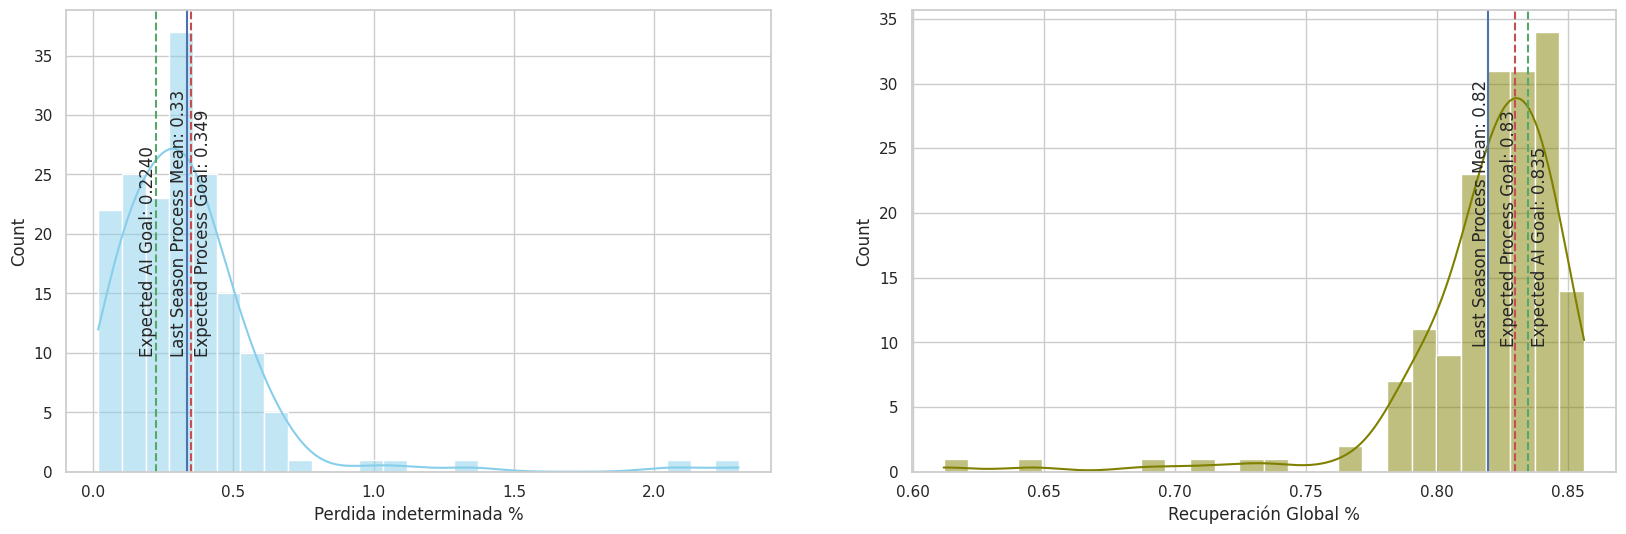

In [11]:
sns.set(style="whitegrid")  
fig,axs = plt.subplots(1,2, figsize = (20,6))

# Perdida Indeterminada %
sns.histplot(data=df, x="Perdida indeterminada %", kde=True, color="skyblue", ax=axs[0])
axs[0].axvline(0.349, 0,1,color='r',linestyle='--')
axs[0].text(0.349 + 0.01,10,'Expected Process Goal: 0.349',rotation=90)

axs[0].axvline(0.2240, 0,1,color='g',linestyle='--')
axs[0].text(0.2240 - 0.06,10,'Expected AI Goal: 0.2240',rotation=90)

axs[0].axvline(df['Perdida indeterminada %'].mean(), 0,1, color ='b')
axs[0].text(df['Perdida indeterminada %'].mean()-0.06,10,'Last Season Process Mean: {:.2f}'.format(df['Perdida indeterminada %'].mean()),rotation=90)

# Recuperación Global %
sns.histplot(data=df, x="Recuperación Global %", kde=True, color="olive", ax=axs[1])

axs[1].axvline(0.83, 0,1,color='r',linestyle='--')
axs[1].text(0.83 - 0.006,10,'Expected Process Goal: 0.83',rotation=90)

axs[1].axvline(0.835, 0,1,color='g',linestyle='--')
axs[1].text(0.835 + 0.001,10,'Expected AI Goal: 0.835',rotation=90)

axs[1].axvline(df['Recuperación Global %'].mean(), 0,1, color ='b')
axs[1].text(df['Recuperación Global %'].mean()-0.006,10,'Last Season Process Mean: {:.2f}'.format(df['Recuperación Global %'].mean()),rotation=90)

In [12]:
SugarCane_NextSeason = 4925285.06745934
Expected_Yield_NextSeason_AI = 109.43
Expected_Yield_NextSeason_NO_AI = 108.78
Expected_Yield_NextSeason_NO_IMPROVEMENTS = 105.74

Expected_Sugar_NextSeason_AI = SugarCane_NextSeason*Expected_Yield_NextSeason_AI/1000
Expected_Sugar_NextSeason_NO_AI = SugarCane_NextSeason*Expected_Yield_NextSeason_NO_AI/1000
Expected_Sugar_NextSeason_NO_IMPROVEMENTS = SugarCane_NextSeason*Expected_Yield_NextSeason_NO_IMPROVEMENTS/1000

print("Total tons of Sugar with Improvements and AI",Expected_Sugar_NextSeason_AI)
print("Total tons of Sugar with Improvements Only",Expected_Sugar_NextSeason_NO_AI)
print("Total tons of Sugar with No Improvements and No AI (Last Year Performance Baseline)",Expected_Sugar_NextSeason_NO_IMPROVEMENTS)

Additional_Sugar = Expected_Sugar_NextSeason_AI-Expected_Sugar_NextSeason_NO_IMPROVEMENTS 
print("Total tons of Additional Sugar",Additional_Sugar)

white_proportion = 0.39
refined_proportion = 0.26
brown_proportion = 0.23
raw_proportion = 0.12

white_total = white_proportion*Additional_Sugar
refined_total = refined_proportion*Additional_Sugar
brown_total = brown_proportion*Additional_Sugar
raw_total = raw_proportion*Additional_Sugar

print("Additional tons of White Sugar:",white_total)
print("Additional tons of Refined Sugar:",refined_total)
print("Additional tons of Brown Sugar:",brown_total)
print("Additional tons of Raw Sugar:",raw_total)

Total tons of Sugar with Improvements and AI 538973.9449320756
Total tons of Sugar with Improvements Only 535772.509638227
Total tons of Sugar with No Improvements and No AI (Last Year Performance Baseline) 520799.64303315064
Total tons of Additional Sugar 18174.301898924925
Additional tons of White Sugar: 7087.977740580721
Additional tons of Refined Sugar: 4725.318493720481
Additional tons of Brown Sugar: 4180.089436752733
Additional tons of Raw Sugar: 2180.916227870991


In [13]:
Refined_Marginal_Profit = 424.01
White_Marginal_Profit = 421.90
Brown_Marginal_Profit = 420.77
Raw_Marginal_Profit = 380.49

Total_Profit = white_total*White_Marginal_Profit + refined_total*Refined_Marginal_Profit + brown_total*Brown_Marginal_Profit + raw_total*Raw_Marginal_Profit

print("Total Profit USD:",Total_Profit)

Total_Profit_Raw_Sugar = Additional_Sugar*Raw_Marginal_Profit

print("Total Raw Sugar Reference Profit USD:",Total_Profit_Raw_Sugar)

Total Profit USD: 7582673.151118509
Total Raw Sugar Reference Profit USD: 6915140.129521945
